## Exercise 6

In [355]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = pd.read_csv("Dimension reduction.csv")
y = X.pop('edibility')

X_dum = pd.get_dummies(X)
y_dum = pd.get_dummies(y)

X_fac = pd.DataFrame(X)
y_fac = pd.DataFrame(pd.Categorical(y.factorize()[0]))
for column in X.columns:
    X_fac[column] = pd.Categorical(X[column].factorize()[0])
    
skb_dum = SelectKBest(chi2, k=5)
skb_dum.fit(X_dum, y_dum)

print("Dummies:")
print("Best K:", X_dum.columns[skb_dum.scores_.argmax()])
print("K-value:", skb_dum.scores_.max())
print("5 best K:", np.array(X_dum.columns)[skb_dum.get_support(indices=True)])

skb_fac = SelectKBest(chi2, k=5)
skb_fac.fit(X_fac, y_fac)
np.nan_to_num(skb_fac.scores_, copy=False)

print("\nFactorized:")
print("Best K:", X_fac.columns[skb_fac.scores_.argmax()])
print("K-value:", skb_fac.scores_.max())
print("5 best K:", np.array(X_fac.columns)[skb_fac.get_support(indices=True)])

Dummies:
Best K: odor_n
K-value: 2836.187954176688
5 best K: ['odor_f' 'odor_n' 'gill-color_b' 'stalk-surface-above-ring_k'
 'stalk-surface-below-ring_k']

Factorized:
Best K: stalk-surface-below-ring
K-value: 4114.903521625713
5 best K: ['gill-color' 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'ring-type' 'spore-print-color']


With the dummy categories, *odor 'n'* is the strongest indicator of if a mushroom is edible or not. Looking at the full categories, *stalk-surface-below-ring* seems to to be the most indicative of if a mushroom is edible. 

In general, *stalk-surface-below-ring*, *gill-color*, *stalk-surface-above-ring* and *odor* seems to be the most discriminative features.

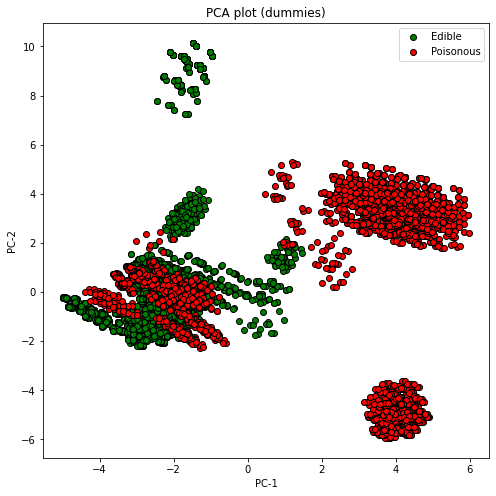

In [356]:
import matplotlib.pyplot as plt

X_dum_scaled = pd.DataFrame(preprocessing.scale(X_dum), columns=X_dum.columns)
pca_dum = decomposition.PCA(n_components=2)
pca_dum.fit(X_dum_scaled)
X_pca_dum = pca_dum.transform(X_dum_scaled)

fig_dum = plt.figure(figsize=(8, 8))
ax_dum = fig_dum.add_subplot(111)
ax_dum.set_title("PCA plot (dummies)")
ax_dum.set_xlabel("PC-1")
ax_dum.set_ylabel("PC-2")

dum_x = X_pca_dum[:, 0]
dum_y = X_pca_dum[:, 1]
edible_dum = np.where(y_dum.iloc[:, 0] == 1)
poisonous_dum = np.where(y_dum.iloc[:, 0] == 0)

ax_dum.scatter(dum_x[edible], dum_y[edible], c='green', label="Edible", edgecolor='black')
ax_dum.scatter(dum_x[poisonous], dum_y[poisonous], c='red', label="Poisonous", edgecolor='black')
ax_dum.legend()

plt.show()

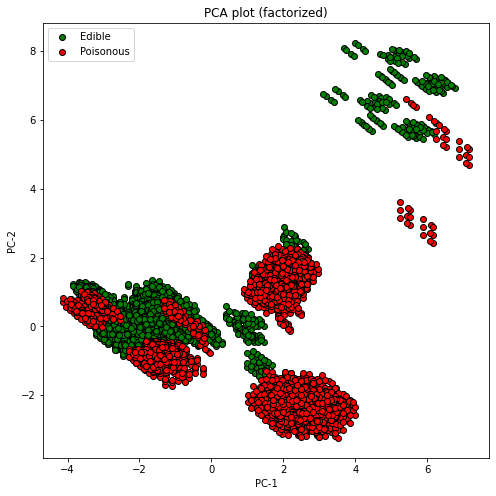

In [357]:
X_fac_scaled = pd.DataFrame(preprocessing.scale(X_fac), columns=X_fac.columns)
pca_fac = decomposition.PCA(n_components=2)
pca_fac.fit(X_fac_scaled)
X_pca_fac = pca_fac.transform(X_fac_scaled)

fig_fac = plt.figure(figsize=(8, 8))
ax_fac = fig_fac.add_subplot(111)
ax_fac.set_title("PCA plot (factorized)")
ax_fac.set_xlabel("PC-1")
ax_fac.set_ylabel("PC-2")

fac_x = X_pca_fac[:, 0]
fac_y = X_pca_fac[:, 1]
edible_fac = np.where(y_fac.iloc[:, 0] == 1)
poisonous_fac = np.where(y_fac.iloc[:, 0] == 0)

ax_fac.scatter(fac_x[edible_fac], fac_y[edible_fac], c='green', label="Edible", edgecolor='black')
ax_fac.scatter(fac_x[poisonous_fac], fac_y[poisonous_fac], c='red', label="Poisonous", edgecolor='black')
ax_fac.legend()

plt.show()

No idea how to directyly evaluate PCA features compared to real features.. Abstract data structures..